In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

## Inital Data Cleaning

In [2]:
df = pd.read_csv("ks-projects-201801.csv")
df = df.drop(columns=['ID', 'category','currency','usd pledged','usd_pledged_real','usd_goal_real'])
df['state'].replace(['failed','canceled'], 0, inplace=True)
df['state'].replace(['successful','live'], 1, inplace=True)
df

,name,main_category,deadline,goal,launched,pledged,state,backers,country
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US
...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US
378657,The Tribe,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US
378659,BioDefense Education Kit,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,US


In [3]:
df['goal rate'] = df['pledged']/df['goal']
df

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,0.080700
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,0.004889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,0.000200
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,0.065795
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,0.000500
378657,The Tribe,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,0.103333
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,0.001333
378659,BioDefense Education Kit,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,US,0.013333


## EDA

In [4]:
fail_df = df[df["state"] == 0]
fail_df

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,0.080700
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,0.004889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,0.000200
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,0.065795
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,0.000500
378657,The Tribe,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,0.103333
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,0.001333
378659,BioDefense Education Kit,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,US,0.013333


Film & Video    0.163464
Publishing      0.113096
Technology      0.107109
Music           0.105950
Games           0.093891
Design          0.080195
Food            0.076872
Fashion         0.071172
Art             0.069146
Photography     0.031163
Crafts          0.027679
Comics          0.020626
Theater         0.018250
Journalism      0.015476
Dance           0.005911
Name: main_category, dtype: float64


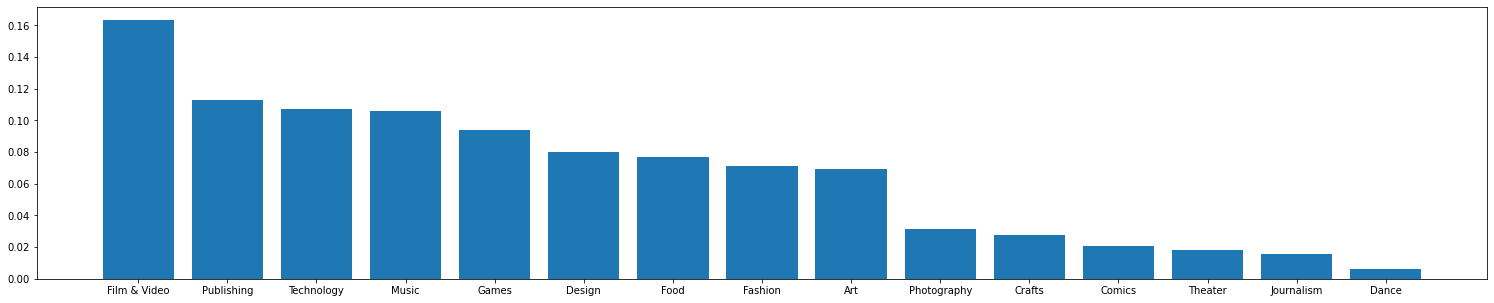

In [5]:
count = fail_df.main_category.value_counts(normalize=True)
print(count)
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(26,5))
plt.bar(count.index,count)
plt.show()

In [6]:
success_df = df[df["state"] == 1]
success_df

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
5,Monarch Espresso Bar,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,1.047500
6,Support Solar Roasted Coffee & Green Energy! ...,Food,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1.205000
11,Lisa Lim New CD!,Music,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,1,100,US,1.016000
14,Tombstone: Old West tabletop game and miniatur...,Games,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,1,761,GB,18.835000
18,Mike Corey's Darkness & Light Album,Music,2012-08-17,250.0,2012-08-02 14:11:32,250.00,1,7,US,1.000000
...,...,...,...,...,...,...,...,...,...,...
378642,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Games,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,1,35,FR,1.246000
378644,The Manual Bar Blade,Design,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,1,120,US,1.762571
378646,The Dog Coffee Book,Publishing,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,1,31,US,1.823179
378651,AT THE BEACH,Music,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,1,78,CA,1.100200


Music           0.178992
Film & Video    0.175167
Games           0.093635
Publishing      0.092128
Art             0.085584
Design          0.079376
Technology      0.049804
Theater         0.048079
Food            0.045841
Comics          0.043274
Fashion         0.042726
Photography     0.024518
Dance           0.017228
Crafts          0.016021
Journalism      0.007627
Name: main_category, dtype: float64


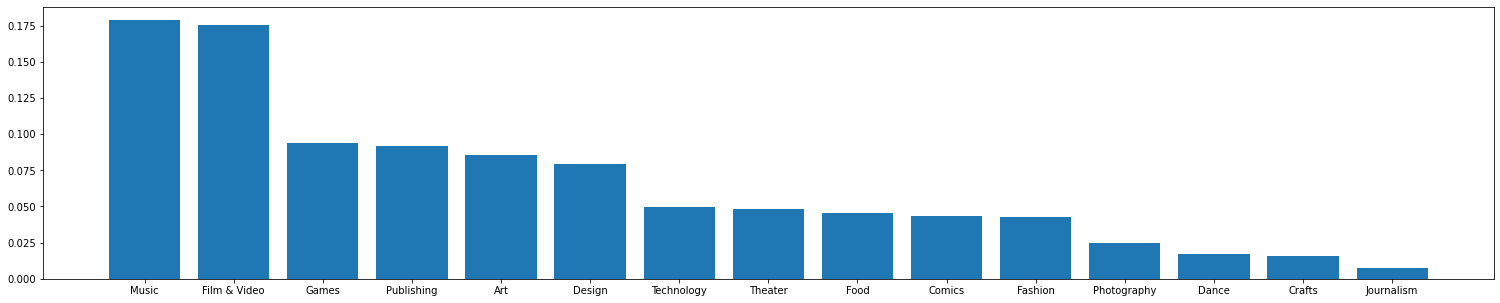

In [7]:
count = success_df.main_category.value_counts(normalize=True)
print(count)
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(26,5))
plt.bar(count.index,count)
plt.show()

In [8]:
Country_success_df = df[df["state"] == 1]
Country_success_df 

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
5,Monarch Espresso Bar,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,1.047500
6,Support Solar Roasted Coffee & Green Energy! ...,Food,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1.205000
11,Lisa Lim New CD!,Music,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,1,100,US,1.016000
14,Tombstone: Old West tabletop game and miniatur...,Games,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,1,761,GB,18.835000
18,Mike Corey's Darkness & Light Album,Music,2012-08-17,250.0,2012-08-02 14:11:32,250.00,1,7,US,1.000000
...,...,...,...,...,...,...,...,...,...,...
378642,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Games,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,1,35,FR,1.246000
378644,The Manual Bar Blade,Design,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,1,120,US,1.762571
378646,The Dog Coffee Book,Publishing,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,1,31,US,1.823179
378651,AT THE BEACH,Music,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,1,78,CA,1.100200


US      0.811956
GB      0.090278
CA      0.031194
AU      0.015210
DE      0.007400
FR      0.007020
NL      0.004768
ES      0.003978
SE      0.003868
IT      0.003766
MX      0.003678
NZ      0.003356
DK      0.002749
HK      0.001835
IE      0.001594
SG      0.001506
CH      0.001470
NO      0.001243
BE      0.001199
AT      0.000892
N,0"    0.000775
LU      0.000146
JP      0.000117
Name: country, dtype: float64


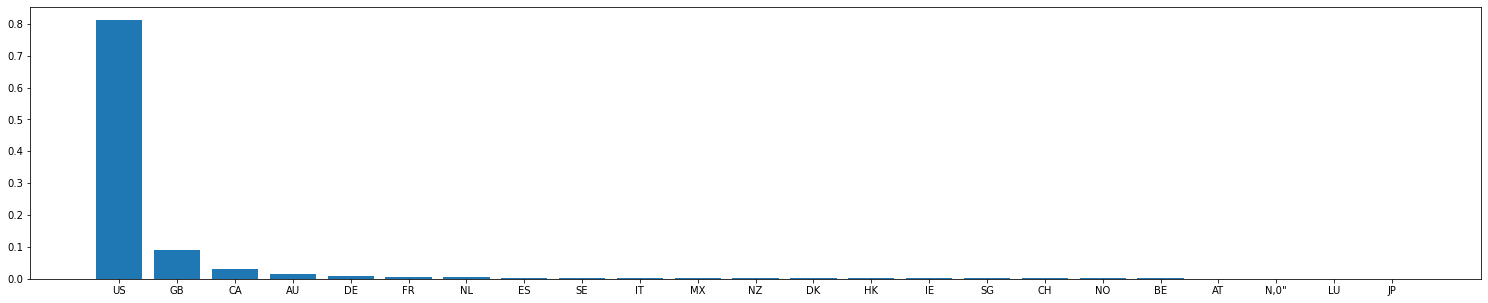

In [9]:
count = Country_success_df.country.value_counts(normalize=True)
print(count)
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(26,5))
plt.bar(count.index,count)
plt.show()

In [10]:
Country_fail_df = df[df["state"] == 0]
Country_fail_df 

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,0.080700
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,0.004889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,0.000200
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,0.065795
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,0.000500
378657,The Tribe,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,0.103333
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,0.001333
378659,BioDefense Education Kit,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,US,0.013333


US      0.762679
GB      0.089421
CA      0.043865
AU      0.023979
DE      0.013193
IT      0.009877
NL      0.009260
FR      0.008309
ES      0.007239
MX      0.005226
SE      0.005112
NZ      0.004131
DK      0.003057
IE      0.002478
CH      0.002321
NO      0.002249
AT      0.001983
BE      0.001882
HK      0.001471
SG      0.001450
N,0"    0.000537
LU      0.000178
JP      0.000101
Name: country, dtype: float64


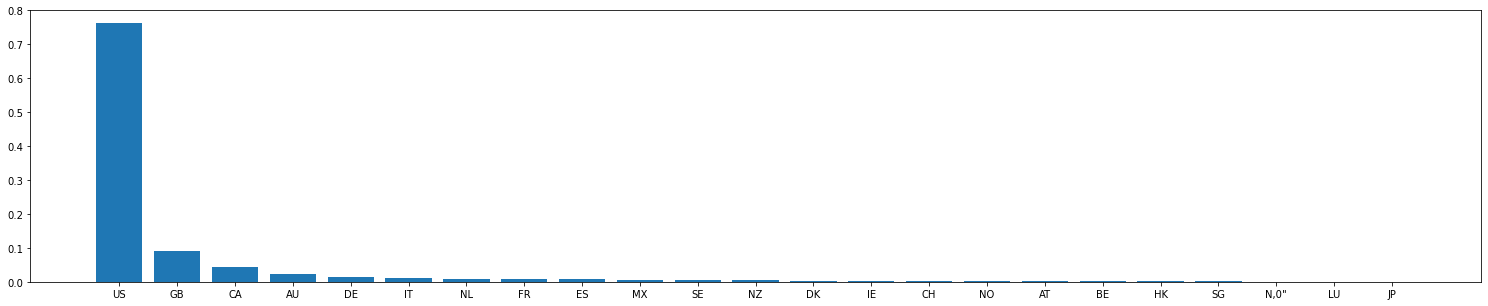

In [11]:
count = Country_fail_df.country.value_counts(normalize=True)
print(count)
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(26,5))
plt.bar(count.index,count)
plt.show()

In [12]:
G_county = df['country'].replace(['DE','IT','NL','FR','ES','MX','SE','NZ','DK','IE','CH','NO','AT','BE','HK','SG','N,0"','LU','JP'], 'Other', inplace=True)
df['country'].value_counts()

US       292627
GB        33672
Other     29767
CA        14756
AU         7839
Name: country, dtype: int64

In [13]:
df.drop(df.index[df['state'] == "suspended"], inplace=True)
df.drop(df.index[df['state'] == "undefined"], inplace=True)

In [14]:
country_counts = pd.crosstab(df['state'], df['country'])
country_counts

country,AU,CA,GB,Other,US
state,,,,,
0,5671,10374,21148,18933,180372
1,2080,4266,12346,7024,111039


In [15]:
G_country = country_counts.sum(axis=0)
G_country

country
AU         7751
CA        14640
GB        33494
Other     25957
US       291411
dtype: int64

In [16]:
state_given_country = country_counts.divide(G_country, axis=1)
state_given_country

country,AU,CA,GB,Other,US
state,,,,,
0,0.731648,0.708607,0.631397,0.729399,0.618961
1,0.268352,0.291393,0.368603,0.270601,0.381039


<AxesSubplot:xlabel='country'>

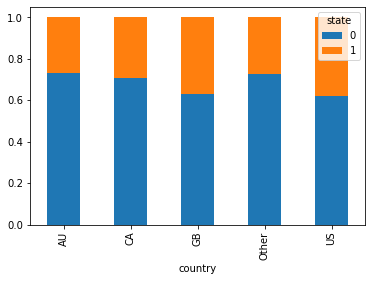

In [17]:
state_given_country = state_given_country.T
state_given_country.plot.bar(stacked=True)

In [18]:
counts = pd.crosstab(df['state'], df['main_category'])
counts

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
0,16353,4878,6546,1398,18966,16832,38659,18180,22205,3660,25057,7370,26747,25331,4316
1,11704,5918,2191,2356,10855,5843,23955,6269,12805,1043,24478,3353,12599,6811,6575


In [19]:
G_county = counts.sum(axis=0)
G_county

main_category
Art             28057
Comics          10796
Crafts           8737
Dance            3754
Design          29821
Fashion         22675
Film & Video    62614
Food            24449
Games           35010
Journalism       4703
Music           49535
Photography     10723
Publishing      39346
Technology      32142
Theater         10891
dtype: int64

In [20]:
state_given_category = counts.divide(G_county, axis=1)
state_given_category

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
0,0.582849,0.451834,0.749227,0.372403,0.635995,0.742315,0.617418,0.743589,0.634247,0.778227,0.505844,0.687308,0.67979,0.788097,0.396291
1,0.417151,0.548166,0.250773,0.627597,0.364005,0.257685,0.382582,0.256411,0.365753,0.221773,0.494156,0.312692,0.32021,0.211903,0.603709


<AxesSubplot:xlabel='main_category'>

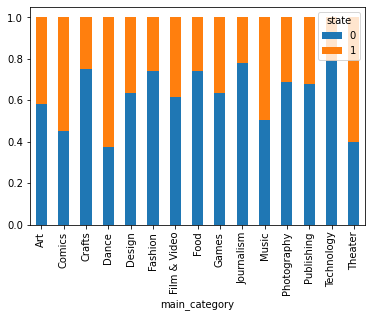

In [21]:
state_given_category = state_given_category.T
state_given_category.plot.bar(stacked=True)

## More Data cleaning

In [22]:
df['main_category'].replace(['Film & Video'], 1, inplace=True)
df['main_category'].replace(['Music'], 2, inplace=True)
df['main_category'].replace(['Games'], 3, inplace=True)
df['main_category'].replace(['Publishing'], 4, inplace=True)
df['main_category'].replace(['Art'], 5, inplace=True)
df['main_category'].replace(['Design'], 6, inplace=True)
df['main_category'].replace(['Technology'], 7, inplace=True)
df['main_category'].replace(['Theater'], 8, inplace=True)
df['main_category'].replace(['Food'], 9, inplace=True)
df['main_category'].replace(['Comics'], 10, inplace=True)
df['main_category'].replace(['Fashion'], 11, inplace=True)
df['main_category'].replace(['Photography'], 12, inplace=True)
df['main_category'].replace(['Dance'], 13, inplace=True)
df['main_category'].replace(['Crafts'], 14, inplace=True)
df['main_category'].replace(['Journalism'], 15, inplace=True)
df

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
0,The Songs of Adelaide & Abullah,4,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,1,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,0.080700
2,Where is Hank?,1,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,0.004889
3,ToshiCapital Rekordz Needs Help to Complete Album,2,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,0.000200
4,Community Film Project: The Art of Neighborhoo...,1,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,0.065795
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),1,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,0.000500
378657,The Tribe,1,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,0.103333
378658,Walls of Remedy- New lesbian Romantic Comedy f...,1,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,0.001333
378659,BioDefense Education Kit,7,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,US,0.013333


In [23]:
G_N_country = df['country'].replace(['US','GB','CA','AU','Other'], [1,2,3,4,5], inplace=True)
df['country'].value_counts()

1    291411
2     33494
5     25957
3     14640
4      7751
Name: country, dtype: int64

In [24]:
df["goal rate"] = pd.to_numeric(df["goal rate"], downcast="float")
df["country"] = pd.to_numeric(df["country"], downcast="float")
df["main_category"] = pd.to_numeric(df["main_category"], downcast="float")
df["backers"] = pd.to_numeric(df["backers"], downcast="float")
df["state"] = pd.to_numeric(df["state"], downcast="float")


In [25]:
df_train = df.loc[:302880].copy()
df_test = df.loc[302881:].copy()

## Logistic Regression analysis with Goal Rate included

In [26]:
from sklearn.linear_model import LogisticRegression

X_train = df_train[["goal rate", "country", "main_category", "backers"]]
X_test = df_test[["goal rate", "country", "main_category", "backers"]]
y_train = df_train["state"]
y_test = df_test["state"]

model = LogisticRegression()
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)
y_pred
print("The number of predicted successes are:", np.count_nonzero(y_pred == 1))
zeros = len(y_pred)- np.count_nonzero(y_pred == 1)
print("The number of predicted failures are:", zeros)

The number of predicted successes are: 18519
The number of predicted failures are: 56150


In [27]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8347908770708058


In [28]:
model.coef_

array([[ 0.62124094, -0.11328537, -0.03449195,  0.01600722]])

## Logistic Regression analysis without Goal Rate included

In [29]:
X_train = df_train[["country", "main_category", "backers"]]
X_test = df_test[["country", "main_category", "backers"]]
y_train = df_train["state"]
y_test = df_test["state"]

model = LogisticRegression()
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)
y_pred
print("The number of predicted successes are:", np.count_nonzero(y_pred == 1))
zeros = len(y_pred)- np.count_nonzero(y_pred == 1)
print("The number of predicted failures are:", zeros)

The number of predicted successes are: 16452
The number of predicted failures are: 58217


In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.788466431852576


In [31]:
model.coef_

array([[-0.12033625, -0.03330406,  0.02140517]])

## KNN analysis using Goal rate and Backers

<AxesSubplot:xlabel='goal rate', ylabel='backers'>

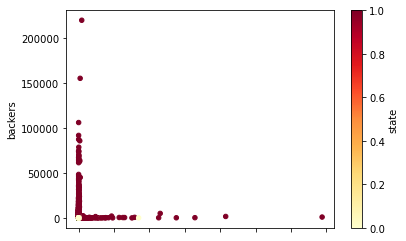

In [32]:
import matplotlib.cm as cm

df_train.plot.scatter(x="goal rate", y="backers", c="state", 
                            cmap=cm.YlOrRd)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

X_train = df_train[["goal rate", "backers"]]
X_test = df_test[["goal rate", "backers"]]
y_train = df_train["state"]
y_test = df_test["state"]

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)
y_pred = np.rint(y_pred)
#print(y_pred[100:150])
print("The number of predicted successes are:", np.count_nonzero(y_pred == 1))
zeros = len(y_pred)- np.count_nonzero(y_pred == 1)
print("The number of predicted failures are:", zeros)

The number of predicted successes are: 27065
The number of predicted failures are: 47604


In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9885628574107059


## KNN analysis using Main Category and country

<AxesSubplot:xlabel='main_category', ylabel='country'>

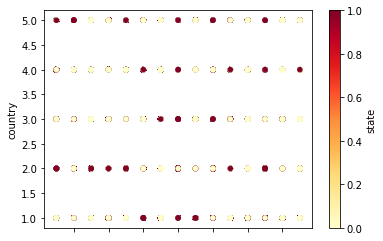

In [35]:
df_train.plot.scatter(x="main_category", y="country", c="state", 
                            cmap=cm.YlOrRd)

#### K = 3

In [36]:
X_train = df_train[["main_category", "country"]]
X_test = df_test[["main_category", "country"]]
y_train = df_train["state"]
y_test = df_test["state"]

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)
y_pred = np.rint(y_pred)
#print(y_pred[100:150])
print("The number of predicted successes are:", np.count_nonzero(y_pred == 1))
zeros = len(y_pred)- np.count_nonzero(y_pred == 1)
print("The number of predicted failures are:", zeros)

The number of predicted successes are: 22470
The number of predicted failures are: 52199


In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6034364997522399


#### K = 5

In [38]:
X_train = df_train[["main_category", "country"]]
X_test = df_test[["main_category", "country"]]
y_train = df_train["state"]
y_test = df_test["state"]

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)
y_pred = np.rint(y_pred)
#print(y_pred[100:150])
print("The number of predicted successes are:", np.count_nonzero(y_pred == 1))
zeros = len(y_pred)- np.count_nonzero(y_pred == 1)
print("The number of predicted failures are:", zeros)

The number of predicted successes are: 15050
The number of predicted failures are: 59619


In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6083917020450254


#### K = 20

In [ ]:
X_train = df_train[["main_category", "country"]]
X_test = df_test[["main_category", "country"]]
y_train = df_train["state"]
y_test = df_test["state"]

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=20)
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)
y_pred = np.rint(y_pred)
#print(y_pred[100:150])
print("The number of predicted successes are:", np.count_nonzero(y_pred == 1))
zeros = len(y_pred)- np.count_nonzero(y_pred == 1)
print("The number of predicted failures are:", zeros)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Project Report

### Inital Data Cleaning:
Here we preformed some initil data cleaning to remove columns that are not helpful in our EDA or models. We also added a column called Goal rate which is just the pledged divided by the goal set. We also changed our classification column to be either 0 or 1, 0 if it failed or was canceled and 1 if it was successful or live. We also grouped the countries that had less than 1% of projects to avoid having so many different countries.

### EDA:
First let’s explain what each of our columns means before getting into the EDA. Our "main_category" column tells us the type of or category kickstarter project it is. Our “country” column tells us the country that the kickstarter projected was created in. Our “state” tells us whether the kickstarter project failed or was successful. In this section we created a bar graph of projects failed based on their "main_category"  and then created another bar graph for projects that succeeded based on their "main_category". We then created a bar graph of projects failed but based on "country" rather than "main_category" and also created a bar graph of projects that succeeded based on their country. However, this did not show us as much as we had hoped, so we tried to analyze further by looking at the success rate based on each category in "main_catergory" and "state" by using a cross tab and then making a stacked bar graph. So we created one stacked bar graph of the cross tab between country and state and another stacked bar graph of the cross tab between main category and state

This showed us more of what we are looking for because the data didn't look as skewed when we had a large majority of projects being from the US or being a Film and Video project. We found that most of the countries had a similar success to fail ratio. We also saw that technology had the highest fail rate in main category and theater and dance had the highest success rate in "main_category"


### More Data Cleaning:
We changed our categorical features into numeric representations so that our data will work with our models. We then split our training and testing data 80/20

### Logistic Regression Analysis with Goal Rate
Here we performed logistic regression with "goal rate", "country", "main_category", and "backers". We tested 74669 data points and our prediction came out 24.8% of the projects succeeded and 75.2% failed. We then calculated the accuracy of our predicted with the actual classification. We got a 83% accuracy score

### Logistic Regression analysis without Goal Rate included

Here we performed Logistic Regression without Goal Rate, because we hypothesize that Goal Rate will be the most influential feature. This was also confirmed in our previous logistic regression section by looking at the coefficients. We tested 74669 data points and our prediction came out 38.8% of the projects succeeded and 61.2% failed. We then calculated the accuracy of our predicted with the actual classification. We got a 78% accuracy  score on our logistic regression model when using "country", "main_category" and "backers"

## KNN using Goal and Backers:
We performed KNN on our data set using the features "goal rate" and "backers". We used these two features first because they have been our most useful features as shown in our coefficients array in Logistic Regression. We first graphed the relationship between goal rate and backers. Once we ran KNN on our data using the selected features and a K of 5 we got 36.2% classified as successful and 63.8% classified as failed. We then calculated our accuracy score and got 98.8% correctly predicted. We decided to stick with K = 5 because our accuracy was so high. This further confirms that our 2 best features are goal_rate and backers.

## KNN using Main_Category and Country:
We performed KNN on our data set using the features "main_category" and "country". We used these two features next because they have are our worst features as shown in our coefficients array in Logistic Regression. We first graphed the relationship between main_category and country. We then ran KNN on our data set 3 different times using K = 3, K = 5, and K = 20. For K = 3 we get an accuracy of 60.3%, for K = 5 we get an accuracy of 60.8% and K = 20 we get an accuracy of 63.1%. Based on the Elbow method, after 3 we do not get a much better score for accuracy, so we decide K = 3 is the best K.

## Contributions:
Ryan: EDA, KNN <br>
Steven: EDA, Data Cleaning<br>
Angelica: EDA, Data Cleaning<br>
Jinseok: Data Cleaning, Logistic Regression<br>